In [24]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [25]:
# Load the balanced dataset
balanced_df = pd.read_csv('fruit.csv')

In [26]:
balanced_df['label'].unique()

array(['Almond', 'Apple', 'Apricot', 'Avocado', 'Beans', 'Beetroot',
       'Bitter Melon', 'Bottle Gourd', 'Brinjal (Eggplant)', 'Broccoli',
       'Buckwheat', 'Cabbage', 'Capsicum (Bell Pepper)', 'Cardamom',
       'Carrot', 'Cashew', 'Cauliflower', 'Chayote', 'Chestnut',
       'Chia Seed', 'Chillies', 'Cinnamon', 'Clove', 'Coconut', 'Coffee',
       'Corn (Maize)', 'Cotton', 'Cranberries', 'Currants',
       'Custard Apple', 'Date Palm', 'Dragon Fruit', 'Elderberries',
       'Fenugreek (Methi)', 'Ginger', 'Goji Berries', 'Grapes', 'Guava',
       'Hazelnut', 'Hemp', 'Jackfruit', 'Java Plum',
       'Jujube (Chinese Date)', 'Jute', 'Kiwi', 'Kiwifruit', 'Lemons',
       'Lettuce', 'Limes', 'Loquat', 'Lychee', 'Mango', 'Medlar',
       'Millet', 'Moringa (Sitalchini)', 'Mountain Apple (Rose Apple)',
       'Oats', 'Okra', 'Olive', 'Onion', 'Orange', 'Papaya',
       'Passion Fruit', 'Peaches', 'Peanut', 'Peas', 'Pineapple', 'Plums',
       'Pomegranate', 'Pomegranates', 'Potato', 'P

In [27]:
balanced_df.shape

(36400, 9)

In [28]:
balanced_df['label'].value_counts()

label
Almond          400
Pomegranate     400
Pineapple       400
Peas            400
Peanut          400
               ... 
Currants        400
Cranberries     400
Cotton          400
Corn (Maize)    400
Watermelons     400
Name: count, Length: 91, dtype: int64

In [29]:
# Feature scaling
scaler = StandardScaler()
features = balanced_df.drop('label', axis=1)
target = balanced_df['label']
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)


In [30]:
# Splitting the data into train, validation, and test sets
# Splitting the data into train and test sets
X_train, X_temp, y_train, y_temp = train_test_split(scaled_df, target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [31]:
import joblib


In [32]:
from sklearn.neural_network import MLPClassifier

# Define the MLP model
MLP = MLPClassifier(hidden_layer_sizes=(150, 45, 100), activation='relu', max_iter=50, solver='adam', random_state=0)

# Initialize lists to store training, validation, and testing accuracies
training_accuracies = []
validation_accuracies = []
testing_accuracies = []

# Train the MLP model and keep track of training, validation, and testing accuracies
for epoch in range(1, MLP.max_iter + 1):  # Use max_iter attribute of MLPClassifier
    MLP.partial_fit(X_train, y_train, classes=np.unique(y_train))
    training_accuracy = MLP.score(X_train, y_train)
    validation_accuracy = MLP.score(X_val, y_val)
    testing_accuracy = MLP.score(X_test, y_test)
    training_accuracies.append(training_accuracy)
    validation_accuracies.append(validation_accuracy)
    testing_accuracies.append(testing_accuracy)
    print(f"Epoch {epoch}: Training Accuracy: {training_accuracy}, Validation Accuracy: {validation_accuracy}, Testing Accuracy: {testing_accuracy}")

# Plotting training and validation accuracy over epochs
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Performance over Epochs')
plt.legend()
plt.show()

# Calculate final training accuracy
training_accuracy_mlp = training_accuracies[-1]
print("MLP Training Accuracy: ", training_accuracy_mlp)

# Calculate and print final validation accuracy
accuracy_val_mlp = validation_accuracies[-1]
print("MLP Accuracy on Validation Set: ", accuracy_val_mlp)


# Calculate and print final testing accuracy
mlp_accuracy= testing_accuracies[-1]
print("MLP Accuracy on Test Set: ", mlp_accuracy)


# Save the trained MLP model
filename_mlp = 'mlp_model.pkl'
with open(filename_mlp, 'wb') as file:
    joblib.dump(MLP, file)


Epoch 1: Training Accuracy: 0.341679748822606, Validation Accuracy: 0.3272893772893773, Testing Accuracy: 0.3371794871794872
Epoch 2: Training Accuracy: 0.4176609105180534, Validation Accuracy: 0.3945054945054945, Testing Accuracy: 0.4062271062271062
Epoch 3: Training Accuracy: 0.4485478806907378, Validation Accuracy: 0.4269230769230769, Testing Accuracy: 0.43040293040293043
Epoch 4: Training Accuracy: 0.4673469387755102, Validation Accuracy: 0.44267399267399266, Testing Accuracy: 0.4510989010989011
Epoch 5: Training Accuracy: 0.481436420722135, Validation Accuracy: 0.46190476190476193, Testing Accuracy: 0.4653846153846154
Epoch 6: Training Accuracy: 0.49195447409733123, Validation Accuracy: 0.4705128205128205, Testing Accuracy: 0.47545787545787543
Epoch 7: Training Accuracy: 0.5023547880690737, Validation Accuracy: 0.4758241758241758, Testing Accuracy: 0.4835164835164835
Epoch 8: Training Accuracy: 0.5098116169544741, Validation Accuracy: 0.47893772893772896, Testing Accuracy: 0.49029

C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:693: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Epoch 13: Training Accuracy: 0.5350078492935636, Validation Accuracy: 0.5069597069597069, Testing Accuracy: 0.5146520146520146
Epoch 14: Training Accuracy: 0.5370879120879121, Validation Accuracy: 0.504029304029304, Testing Accuracy: 0.5203296703296704
Epoch 15: Training Accuracy: 0.5415620094191522, Validation Accuracy: 0.5038461538461538, Testing Accuracy: 0.521978021978022
Epoch 16: Training Accuracy: 0.5445447409733124, Validation Accuracy: 0.506043956043956, Testing Accuracy: 0.5227106227106227
Epoch 17: Training Accuracy: 0.5483124018838305, Validation Accuracy: 0.5102564102564102, Testing Accuracy: 0.5243589743589744
Epoch 18: Training Accuracy: 0.5513343799058085, Validation Accuracy: 0.512087912087912, Testing Accuracy: 0.5249084249084249
Epoch 19: Training Accuracy: 0.554552590266876, Validation Accuracy: 0.5137362637362637, Testing Accuracy: 0.5265567765567766
Epoch 20: Training Accuracy: 0.5595368916797488, Validation Accuracy: 0.5186813186813187, Testing Accuracy: 0.531684

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Training the Random Forest Classifier
RF = RandomForestClassifier(
    criterion='gini',
    max_depth=7,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=1000,  # Number of trees in the forest
    random_state=0)
RF.fit(X_train, y_train)

# Calculate training accuracy
training_accuracy = RF.score(X_train, y_train)
print("Random Forest Training Accuracy: ", training_accuracy)

# Predicting on the validation set
predicted_values_val = RF.predict(X_val)

# Calculating accuracy on validation set
accuracy_val = accuracy_score(y_val, predicted_values_val)
print("Random Forest Accuracy on Validation Set: ", accuracy_val)

# Predicting on the test set
predicted_values_test = RF.predict(X_test)

# Calculating accuracy on test set
rf_accuracy= accuracy_score(y_test, predicted_values_test)
print("Random Forest Accuracy on Test Set: ", rf_accuracy)


# Save the trained model
filename = 'rf_model.pkl'
with open(filename, 'wb') as file:
    joblib.dump(RF, file)

Random Forest Training Accuracy:  0.4813971742543171
Random Forest Accuracy on Validation Set:  0.4655677655677656
Random Forest Accuracy on Test Set:  0.4652014652014652


Decision Tree Training Accuracy:  0.7769585253456222
Decision Tree Accuracy on Validation Set:  0.5752688172043011


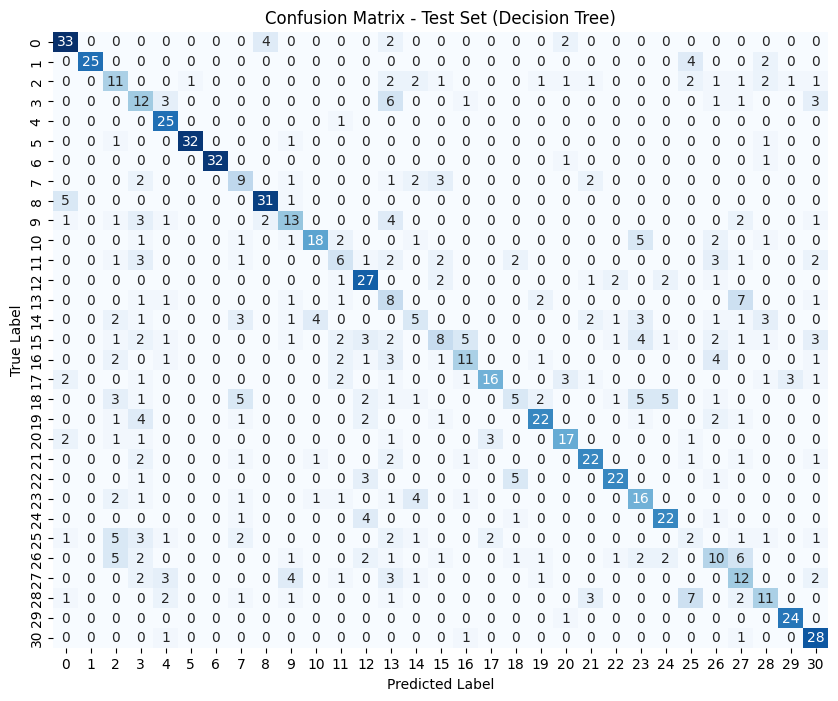

Decision Tree Accuracy on Test Set:  0.567741935483871


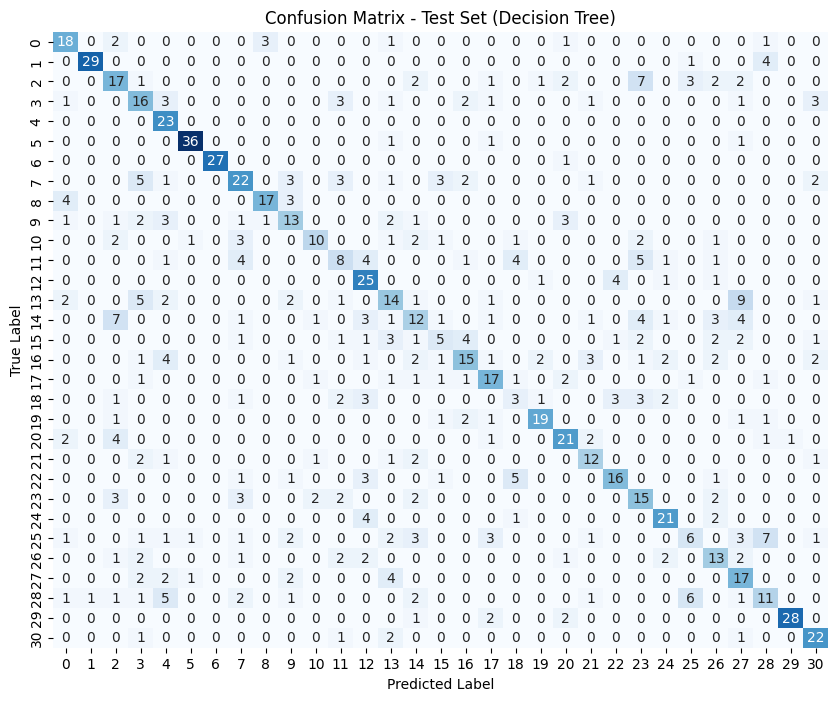

Best Parameters where the model achieved the best score:
{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'random_state': 2, 'splitter': 'best'}
Best Score: 0.5423963133640554


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Parameters for Decision Tree Classifier (Expanded range for exploration)
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 3, 4],  # Expanded range
    'min_samples_leaf': [1, 2, 3],  # Expanded range
    'max_features': ['sqrt', 'log2', None],  # Expanded options
    'ccp_alpha': [0.0, 0.0001, 0.001, 0.01, 0.1],
    'max_depth': [10, 15, 20, 25],  # Expanded range
    'random_state': [2]
}

# Create a Decision Tree Classifier
DT = DecisionTreeClassifier()

# Perform GridSearchCV with cross-validation on the training set
grid_search = GridSearchCV(estimator=DT, param_grid=dt_params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_dt = grid_search.best_params_
best_dt = grid_search.best_estimator_

# Print training accuracy
accuracy_train_dt = best_dt.score(X_train, y_train)
print("Decision Tree Training Accuracy: ", accuracy_train_dt)

# Evaluate the best model on the validation set
predicted_values_val_dt = best_dt.predict(X_val)
accuracy_val_dt = accuracy_score(y_val, predicted_values_val_dt)
print("Decision Tree Accuracy on Validation Set: ", accuracy_val_dt)


# Evaluate the best model on the test set
predicted_values_test_dt = best_dt.predict(X_test)
dt_accuracy= accuracy_score(y_test, predicted_values_test_dt)
print("Decision Tree Accuracy on Test Set: ", dt_accuracy)


# Get the best parameters where the model achieved the best score
best_params_dt = grid_search.best_params_
best_score_dt = grid_search.best_score_

print("Best Parameters where the model achieved the best score:")
print(best_params_dt)
print("Best Score:", best_score_dt)

# Save the best trained Decision Tree model
filename_dt = 'best_dt_model.pkl'
with open(filename_dt, 'wb') as file_dt:
    joblib.dump(best_dt, file_dt)


C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\sdesh\AppData\Local\Packages\PythonSoftwareFoundation.P

SVM Training Accuracy:  0.6569124423963134
SVM Accuracy on Validation Set:  0.5946236559139785


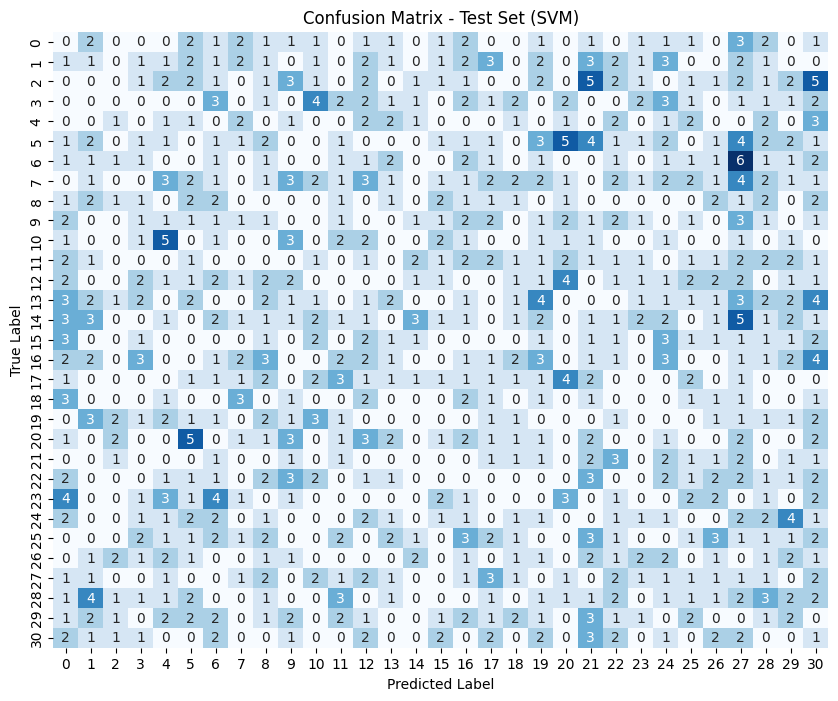

SVM Accuracy on Test Set:  0.6086021505376344


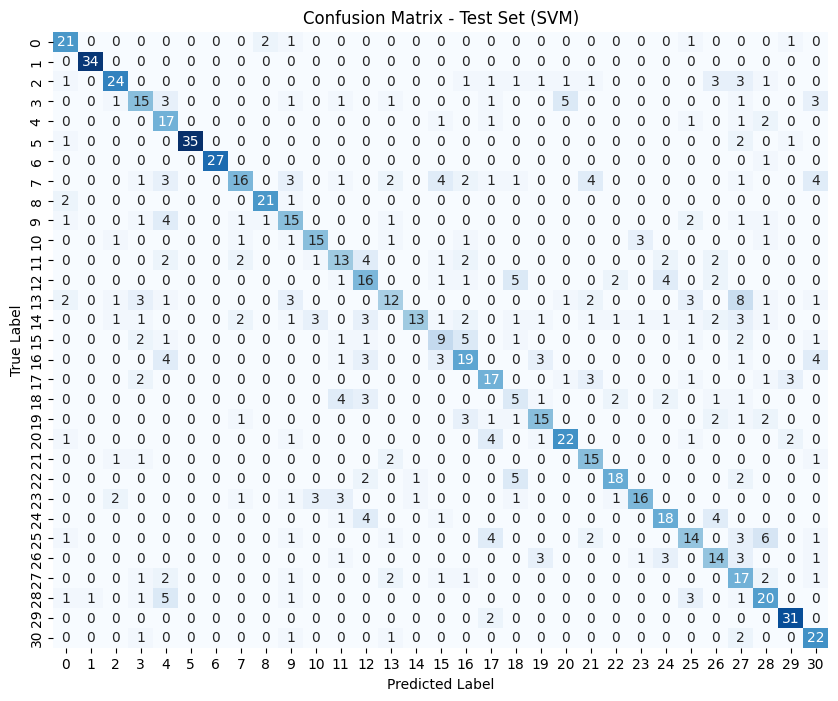

Best Parameters where the SVM model achieved the best score:
{'C': 1.0, 'kernel': 'rbf', 'max_iter': 139, 'tol': 0.025}
Best Score for SVM: 0.5993087557603686


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Parameters for SVM
svm_params = {
    'C': [0.25, 0.50, 0.75, 1.0],
    'tol': [1e-10, 1e-5, 1e-4, 0.025, 0.50, 0.75],
    'kernel': ['linear', 'poly', 'sigmoid', 'rbf'],
    'max_iter': [int(x) for x in np.linspace(start=1, stop=250, num=10)]
}

# Create an SVM Classifier
svm = SVC()

# Perform GridSearchCV with cross-validation on the training set
grid_search_svm = GridSearchCV(estimator=svm, param_grid=svm_params, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Get the best parameters and best estimator for SVM
best_params_svm = grid_search_svm.best_params_
best_svm = grid_search_svm.best_estimator_

# Print training accuracy for SVM
accuracy_train_svm = best_svm.score(X_train, y_train)
print("SVM Training Accuracy: ", accuracy_train_svm)

# Evaluate the best model on the validation set
predicted_values_val_svm = best_svm.predict(X_val)
accuracy_val_svm = accuracy_score(y_val, predicted_values_val_svm)
print("SVM Accuracy on Validation Set: ", accuracy_val_svm)


# Evaluate the best model on the test set
predicted_values_test_svm = best_svm.predict(X_test)
svm_accuracy= accuracy_score(y_test, predicted_values_test_svm)
print("SVM Accuracy on Test Set: ", svm_accuracy)


# Get the best parameters where the SVM model achieved the best score
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters where the SVM model achieved the best score:")
print(best_params_svm)
print("Best Score for SVM:", best_score_svm)

# Save the best trained SVM model
filename_svm = 'best_svm_model.pkl'
with open(filename_svm, 'wb') as file_svm:
    joblib.dump(best_svm, file_svm)


MLP Accuracy: 0.6096774193548387
Random Forest Accuracy: 0.6096774193548387
RF Accuracy: 0.6634408602150538
Decision Tree Accuracy: 0.567741935483871
SVM Accuracy: 0.6086021505376344


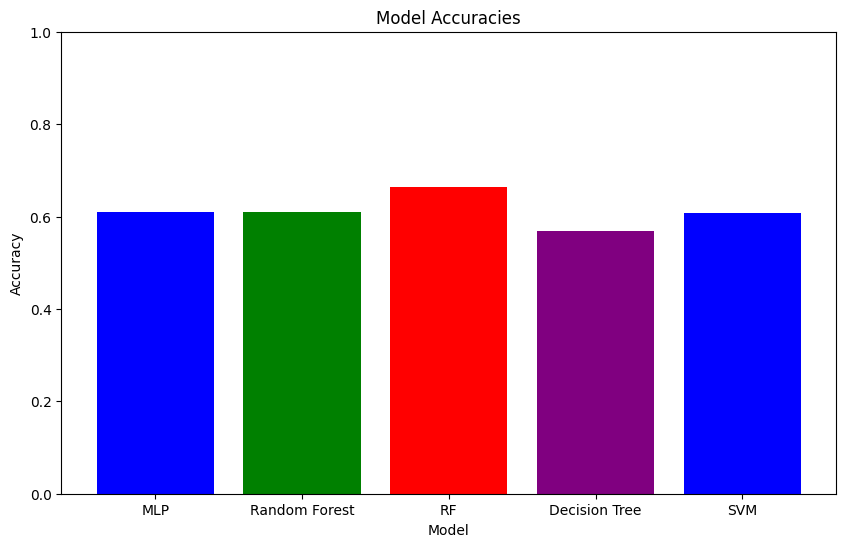

In [ ]:
# Define the accuracies and model names
model_accuracies = [mlp_accuracy, rf_accuracy, dt_accuracy, svm_accuracy]
model_names = ["MLP", "Random Forest", "Decision Tree", "SVM"]

# Print accuracies
for model_name, accuracy in zip(model_names, model_accuracies):
    print(f"{model_name} Accuracy: {accuracy}")

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'red', 'purple'])
plt.title('Model Accuracies')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy ranges from 0 to 1
plt.show()

In [ ]:
import joblib

# Save the best model
import shutil

# Assuming you have variables mlp_accuracy and rf_accuracy containing their accuracies
best_model = max([("mlp_model.pkl", mlp_accuracy), ("rf_model.pkl", rf_accuracy),("best_dt_model.pkl",dt_accuracy),("best_svm_model.pkl",svm_accuracy)], key=lambda x: x[1])

print("Best Model:", best_model[0])
print("Accuracy:", best_model[1])

# Destination filename
destination_filename = 'ok.pkl'

# Copy the selected model file to the destination
shutil.copyfile(best_model[0], destination_filename)


In [ ]:
import joblib
import numpy as np

# Load the best model
with open('ok.pkl', 'rb') as file:
    best_model = joblib.load(file)


# User input
user_input = np.array([[6.79,21.39,48.23,2297,805.54,104,17,231]])

# Scale the user input using the fitted scaler
scaled_input = scaler.transform(user_input)

# Convert the scaled input to string format
scaled_input_string = ','.join(map(str, scaled_input[0]))

user_input_values = list(map(float, scaled_input_string.split(',')))

# Use the best model to predict the crop
predicted_crop = best_model.predict([user_input_values])[0]

print("Recommended Crop:", predicted_crop)
